In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
%pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85'

In [5]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/train_df.csv')

In [6]:
X = train_df[['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']]
Y = train_df['ICE_state']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [8]:
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [11]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/RF_model', 'rb') as f:
    rf = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/GBC_model', 'rb') as f:
    gb = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/AB_model', 'rb') as f:
    ab = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/XGB_model', 'rb') as f:
    xgb = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/LGB_model', 'rb') as f:
    lgb = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/CB_model', 'rb') as f:
    cb = pickle.load(f)
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/HGBC_model', 'rb') as f:
    hgb = pickle.load(f)

In [12]:
# 학습 데이터와 테스트 데이터에 대한 정확도 계산
train_accuracies = []
test_accuracies = []

In [13]:
for model in [rf, gb, ab, xgb, lgb, cb, hgb]:
    train_preds = model.predict(x_train_scaled)
    test_preds = model.predict(x_test_scaled)
    
    train_accuracies.append(accuracy_score(y_train, train_preds))
    test_accuracies.append(accuracy_score(y_test, test_preds))

# 모델 이름
model_names = ['RandomForest', 'GradientBoosting', 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost', 'HGB']

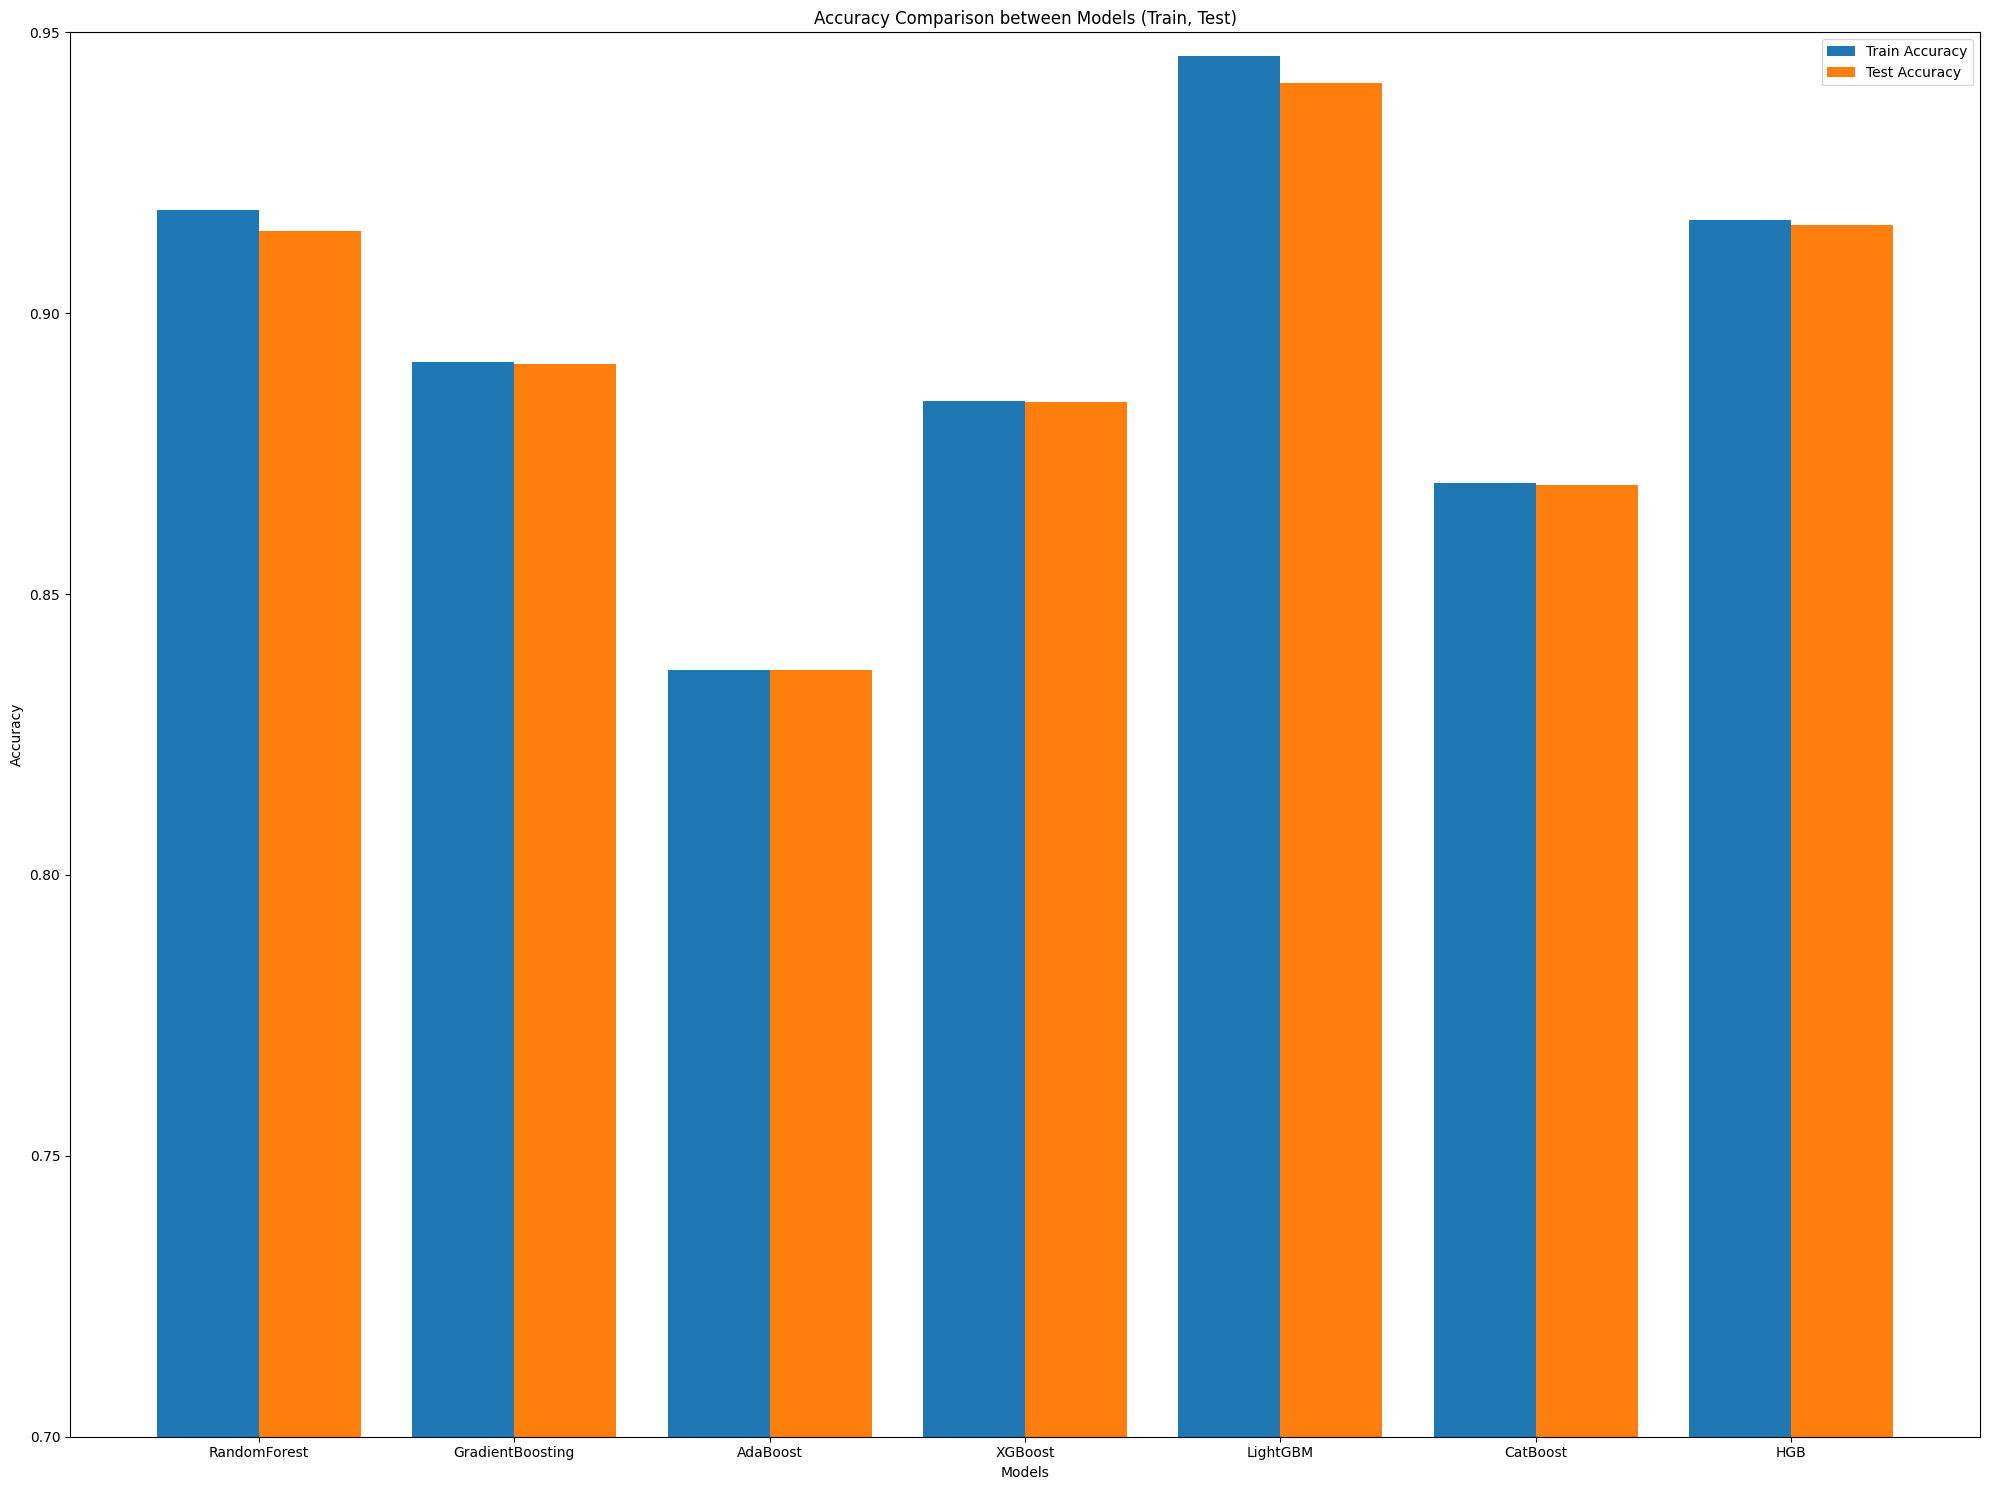

In [19]:
# 정확도 비교 그래프
plt.figure(figsize=(20, 15))
x = range(len(model_names))

# 학습 데이터에 대한 정확도
plt.bar([i - 0.2 for i in x], train_accuracies, width=0.4, label='Train Accuracy', align='center')

# 테스트 데이터에 대한 정확도
plt.bar([i + 0.2 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Models (Train, Test)')

# y축 범위를 0.75에서 1 사이로 설정
plt.ylim(0.7, 0.95)

plt.xticks(x, model_names)
plt.legend()

plt.tight_layout()
# plt.show()

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/Accuracy Comparison.png')

In [ ]:
|